In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\Projects\AI Workgroup\Titanic\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# import plotting libraries
import matplotlib.pyplot as plt
#import sns for better plots, it is handy to manage subplots
import seaborn as sns

D:\Projects\AI Workgroup\Titanic\data\test.csv
D:\Projects\AI Workgroup\Titanic\data\train.csv


In [7]:
data = pd.read_csv("D:/Projects/AI Workgroup/Titanic/data/train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

An overview of the dataset by calling describe().
 
What information can be extracted?
how many survived?
Is there any missing values?

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The variables are in different types: categorical (sex, embarked, sibsp, parch, embarked), Ordinal (pclass), and continuous (age). And we visualize them in different ways

### **visualize catgorical & Ordinal variables**

* survivial rate is low (< 40%)
* age has missing values, and it spreads out widely
* it is hard to tell much about the categorical/ordinal variables by this way
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival.
* ....
we look for a better way to explore the relationships --> plots

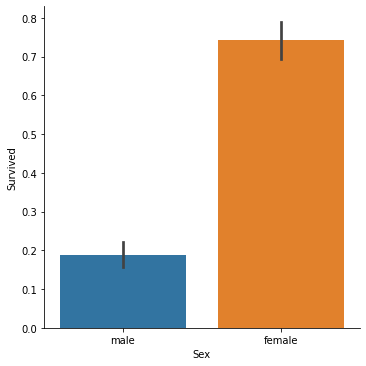

In [9]:
# plotting only one variable
sns.catplot(x="Sex", y="Survived", kind="bar",data=data)

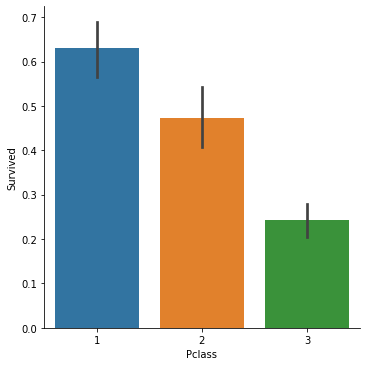

In [10]:
# similarly one can plot any other categorical & Ordinal variable
sns.catplot(x="Pclass", y="Survived", kind="bar",data=data)

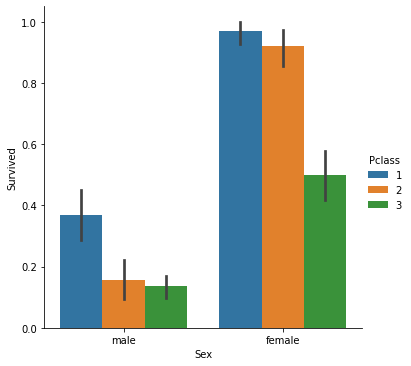

In [11]:
# plot multiple variables together
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data)

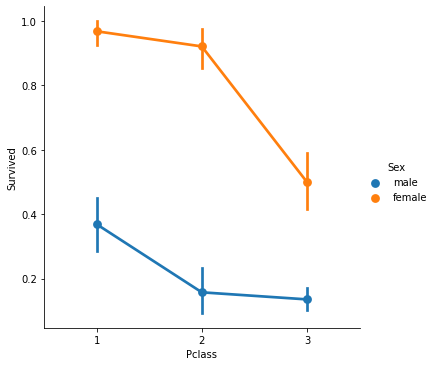

In [12]:
#An alternative style for visualizing the same information is offered by the pointplot() function. 
#This function also encodes the value of the estimate with height on the other axis, 
#but rather than showing a full bar, it plots the point estimate and confidence interval. 
#Additionally, pointplot() connects points from the same hue category. 
#This makes it easy to see how the main relationship is changing as a function of the hue semantic, 
#because your eyes are quite good at picking up on differences of slopes:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=data)
# this confirms that there is an interaction effect between sex and pclass

In [13]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
# similarly one can calculate the survival rate for Pclass or any other categorical & ordinal variable
# or, calculate the survival rate in combination of a few variables
data.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### **visualize continuous variables**

lets look at continuous variable (age) now.
But remember there was one problem? And what kind of plots do you think is good for visualizing continuous values?

Age has missing value.                         
How to interpolate the missing ages? By mean? By mode?

In [15]:
# use other features to interpolate the missing age
# this part is taking from another notebook
# https://www.kaggle.com/ash316/eda-to-prediction-dietanic
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
data.Age.isnull().any() #So no null values left finally 

False

d:\users\f68881a\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

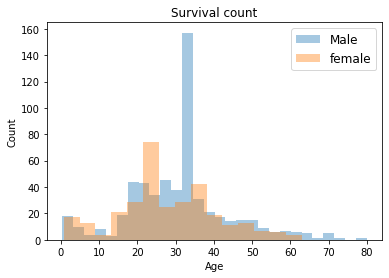

In [18]:
df =data[data.Sex == 'male']
sns.distplot(df['Age'],  kde=False,label='Male')

df =data[data.Sex == 'female']
sns.distplot(df['Age'],  kde=False,label='female')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Survival count')
plt.xlabel('Age')
plt.ylabel('Count')

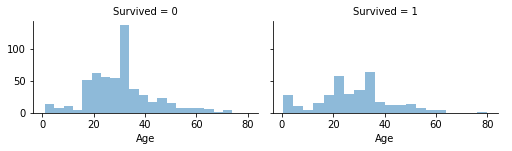

In [19]:
grid = sns.FacetGrid(data, col='Survived',height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

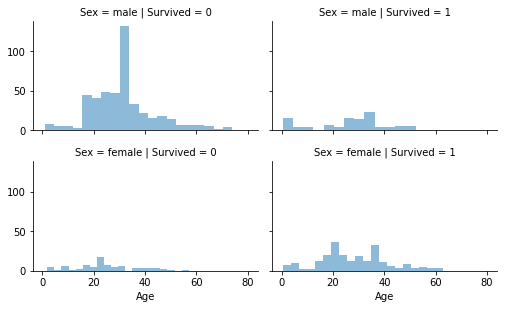

In [20]:
grid = sns.FacetGrid(data, col='Survived',row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## feature engineering

In [21]:
# a mix of categorical and continuous varibales makes it difficult to choose proper models
# also the adjacent ages don't make a big difference (being 20 or 21 doesn't change much) but more the big changes in age (20 vs 80)
# so lets categorize the age variable into 5 levels
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

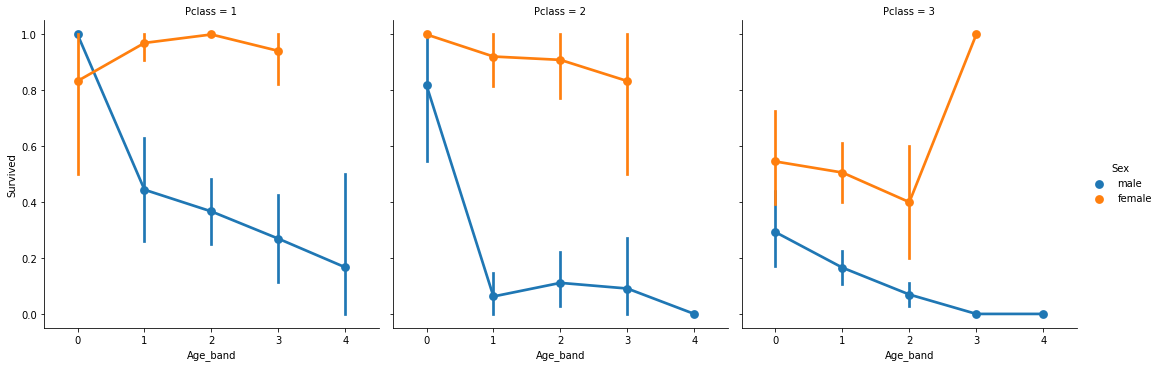

In [22]:
# sns.catplot(x="Age_band", y="Survived", row="Pclass", hue='Sex', kind="box", orient="h", data=data)
sns.catplot(x="Age_band", y="Survived", col="Pclass", hue="Sex", kind="point", data=data)

we have seen previously that having siblings, parents, or children also seem to make a difference in the survival rate, 
can we make that a feature?

In [23]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

d:\users\f68881a\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
# turn sex into integers instead of string
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'FamilySize', 'IsAlone'],
      dtype='object')

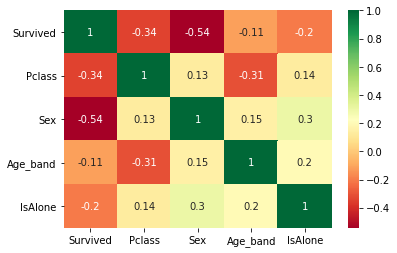

In [26]:
# drop the rest columns
droplist = ['PassengerId', 'Name', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'FamilySize']
data.drop(droplist,axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.xticks()
plt.yticks()
plt.show()

## Modeling

there are many different models available, here we explore 3 different models:
* logistic regression (regression type)
* decision tree (tree type)
* random forest (bagging + randomize features) \
\
other models that are also applicable:
* SVM
* KNN/other clustering models
* Peceptron
* ...

also we should use cross_validation to make sure the fitted model performance is generalisable to test data

In [61]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [28]:
data.head(5)

,Survived,Pclass,Sex,Age_band,IsAlone
0,0,3,1,1,0
1,1,1,0,2,0
2,1,3,0,1,1
3,1,1,0,2,0
4,0,3,1,2,1


In [29]:
train,val=train_test_split(data,test_size=0.3,random_state=42,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
val_X=val[val.columns[1:]]
val_Y=val[val.columns[:1]]

### Logistic regression

The logistic regression function can be written as:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4a5e86f014eb1f0744e280eb0d68485cb8c0a6c3)
This way we can keep one side as the conventional linear regression. The left side of the equation is call log-odds, or probit. 
How do we link this to the binary dependent variable (survival)? We can first reformulate the function a litte bit. By simple algebraic manipulation, the probability that Y=1 is:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/11e03264d56bc270428fae2334fbf3ef11b003c2)

It means with a logistic function, we can transform the linear regression output to a probability that is bounded between 0 and 1:
![](https://res.cloudinary.com/practicaldev/image/fetch/s--yt2nSddw--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/l7xj9gkzufp00gt2txzu.png)
We take 0.5 as cutoff value to turn the probility into categorical values.

There are many different ways to understand logistic regression, for example, using latent variable:


In [30]:
# first fit a logistic regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(val_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,val_Y))

The accuracy of the Logistic Regression is 0.7723880597014925


d:\users\f68881a\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
# since the dataset is small, having a fixed portion of data as validation data is quite expensive
# we use k-fold cross validation to alternate the train and validation set
# split the data into 10 equal parts
X=data[data.columns[1:]]
Y=data['Survived']
kfold = KFold(n_splits=10, shuffle=True, random_state=22) 

In [32]:
logistic_cv_result = cross_val_score(LogisticRegression(),X,Y, cv = kfold,scoring = "accuracy")
print('The mean accuracy of the Logistic Regression under 10-fold validation is: ', np.mean(logistic_cv_result), 
      'std is: ', np.std(logistic_cv_result))

The mean accuracy of the Logistic Regression under 10-fold validation is:  0.791310861423221 std is:  0.04866400964903969


### decision tree

> ![](https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png)

In [33]:
# similarly we do the same to decision tree
tree_cv_result = cross_val_score(DecisionTreeClassifier(),X,Y, cv = kfold,scoring = "accuracy")
print('The mean accuracy of the decision tree under 10-fold validation is: ', np.mean(tree_cv_result), 
      'std is: ', np.std(tree_cv_result))

The mean accuracy of the decision tree under 10-fold validation is:  0.8036454431960051 std is:  0.0399396365921368


### random forest

![](https://i.imgur.com/AC9Bq63.png)

In [34]:
# random forest
forest_cv_result = cross_val_score(RandomForestClassifier(n_estimators=100),X,Y, cv = kfold,scoring = "accuracy")
print('The mean accuracy of the random forest under 10-fold validation is: ', np.mean(forest_cv_result), 
      'std is: ', np.std(forest_cv_result))

The mean accuracy of the random forest under 10-fold validation is:  0.7890886392009987 std is:  0.05264319073733646


In [36]:
# random forest has a required hyper-pqrqmers: number of trees
# we can use cross validatio and grid search to find a good number of it
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=132),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8081036971941498
RandomForestClassifier(n_estimators=300, random_state=132)
{'n_estimators': 300}


In [75]:
## neural network
data = pd.read_csv("D:/Projects/AI Workgroup/Titanic/data/train.csv")
print(len(data.columns))

# get mean aged based on titel
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
data.Age.isnull().any() #So no null values left finally 

droplist = ['PassengerId', 'Name', 'Cabin', 'Ticket']
data.drop(droplist,axis=1,inplace=True)

print(data.head())

ohe_initial = pd.get_dummies(data['Initial'], prefix='title')
print(type(ohe_initial))

new_df = data.append(ohe_initial)

print(new_df.head())

# tf.placeholder(tf.float32, shape=()

12
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Initial
0         0       3    male  22.0      1      0   7.2500        S      Mr
1         1       1  female  38.0      1      0  71.2833        C     Mrs
2         1       3  female  26.0      0      0   7.9250        S    Miss
3         1       1  female  35.0      1      0  53.1000        S     Mrs
4         0       3    male  35.0      0      0   8.0500        S      Mr
<class 'pandas.core.frame.DataFrame'>
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Initial  \
0       0.0     3.0    male  22.0    1.0    0.0   7.2500        S      Mr   
1       1.0     1.0  female  38.0    1.0    0.0  71.2833        C     Mrs   
2       1.0     3.0  female  26.0    0.0    0.0   7.9250        S    Miss   
3       1.0     1.0  female  35.0    1.0    0.0  53.1000        S     Mrs   
4       0.0     3.0    male  35.0    0.0    0.0   8.0500        S      Mr   

   title_Master  title_Miss  title_Mr  title_Mrs  ti

## apply model on test data and submit

In [31]:
test_data = pd.read_csv("D:/Projects/AI Workgroup/Titanic/data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
# formulate test data in the same way
test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_data['Age_band']=0
test_data.loc[test_data['Age']<=16,'Age_band']=0
test_data.loc[(test_data['Age']>16)&(test_data['Age']<=32),'Age_band']=1
test_data.loc[(test_data['Age']>32)&(test_data['Age']<=48),'Age_band']=2
test_data.loc[(test_data['Age']>48)&(test_data['Age']<=64),'Age_band']=3
test_data.loc[test_data['Age']>64,'Age_band']=4

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = 1 #initialize to yes/1 is alone
test_data['IsAlone'].loc[test_data['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

d:\users\f68881a\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
# take features
features = ["Pclass", "Sex", "Age_band", "IsAlone"]
X_test = pd.get_dummies(test_data[features])

# first re-fit a logistic regression on all the training data
# model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100)
model.fit(X,Y)
# make prediction
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
